In [35]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def rosen(x):
    """
    Rosenbrock関数. 最適化アルゴリズムのベンチマークとしてよく使われるらしい.
    
    Parameters
    ----------
    x : array like
        n次元の引数
    
    Returns
    ----------
    answer : float
    """
    
    answer = sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2 )
    
    return answer

In [3]:
def rosen_der(x):
    """
    Rosenbrock関数の点xでの勾配ベクトル
    
    Parameters
    ----------
    x : array like
        n次元の引数
    
    Returns
    ----------
    def : array like
        n次元の勾配ベクトル
    """
    
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm - xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1 - xm)
    der[0] = -400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0])
    der[-1] = 200*(x[-1] - x[-2]**2)
    
    return der

In [4]:
def rosen_hess(x):
    """
    Rosenbrock関数の点xでのヘッセ行列
    
    Parameters
    ----------
    x : array like
        n次元の引数
        
    Returns
    ----------
    H : numpy.ndarray()
        n*nのヘッセ行列
    """
    
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    
    H = H + np.diag(diagonal)
    
    return H

In [5]:
x = np.array([2,3])

In [9]:
rosen_der(x)

array([ 802, -200])

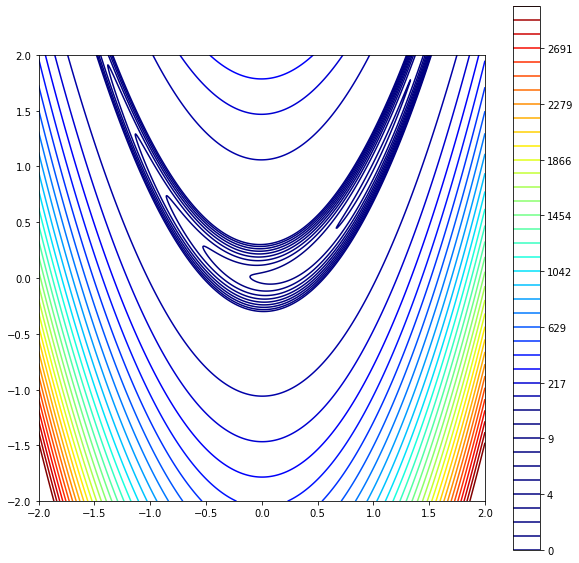

In [85]:
x1 = np.linspace(-2, 2, 1000) 
x2 = np.linspace(-2, 2, 1000)

X1, X2 = np.meshgrid(x1, x2)

# 2変数の場合のRosenbrock関数
def plot_rosen(x1, x2):
    
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2
    
Z = plot_rosen(X1, X2) + 1

fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(111)

def log_lavels(x):
    
    return 10**x

log_lavel = log_lavels( np.linspace(0,5,100) )

#cont10 = ax.contour(X1, X2, Z, log_lavel, cmap='jet', norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))

lavel = np.concatenate([np.linspace(0,10, 10), np.linspace(11,3000, 30)])
cont10 = ax.contour(X1, X2, Z, lavel, cmap='jet')
ax.set_aspect('equal','box')
plt.colorbar(cont10)

/Users/tannokazuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tannokazuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


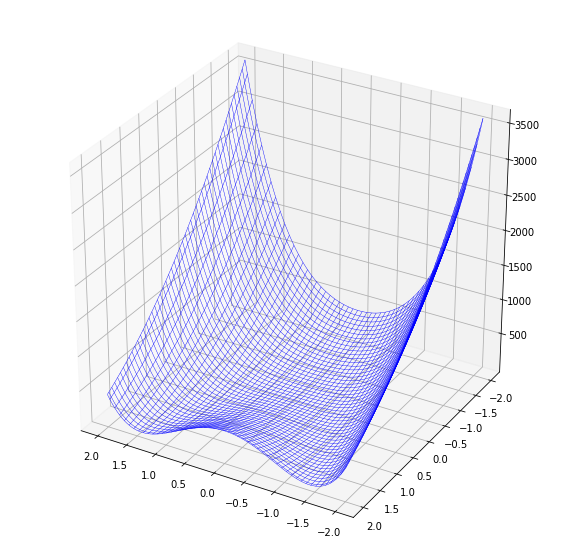

In [68]:
fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(111)
ax = fig.gca(projection='3d')
ax.view_init(elev=30., azim=120)

ax.plot_wireframe(X1, X2, Z, color='blue',linewidth=0.4)